In [1]:
!sudo pip3 install -U spacy

     |████████████████████████████████| 6.2 MB 4.1 MB/s 
     |████████████████████████████████| 653 kB 49.4 MB/s 
     |████████████████████████████████| 181 kB 52.1 MB/s 
     |████████████████████████████████| 457 kB 50.8 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 10.1 MB 39.1 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    U

In [2]:
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 568.0 MB 7.2 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [3]:
# IMPORTS
import spacy
import time
import glob
import numpy as np
import pandas as pd

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

sst_home='drive/My Drive/Trabajo PLN/'
#replace this folder with the name of your folder in Google Colab, 
#where you are saving your notebooks of this course


Mounted at /content/drive


# **Load CSV files containing data**

In [ ]:
train = pd.read_csv(sst_home+"/Dataset/train_data.csv",  names=["headline"])
val = pd.read_csv(sst_home+"/Dataset/validation_data.csv", names=["headline"])
test = pd.read_csv(sst_home+"/Dataset/trial_data.csv", names=["headline"])
train_label_1 = pd.read_csv(sst_home+"/Dataset/train_labels_subtask_1.csv", names=["Value"])
train_label_2 = pd.read_csv(sst_home+"/Dataset/train_labels_subtask_2.csv", names=["Value 1", "Value 2", "Value 3", "Value 4", "Value 5"])
test_label_1 = pd.read_csv(sst_home+"/Dataset/trial_labels_subtask_1.csv", names=["Value"])
test_label_2 = pd.read_csv(sst_home+"/Dataset/trial_labels_subtask_2.csv", names=["Value 1", "Value 2", "Value 3", "Value 4", "Value 5" ])

In [ ]:
print('size of training dataset', len(train))
print('size of validation dataset', len(val))
print('size of test dataset', len(test))
print('size of training label dataset 1', len(train_label_1))
print('size of training label dataset 2', len(train_label_2))
print('size of trial label dataset 1', len(test_label_1))
print('size of trial label dataset 2', len(test_label_2))


size of training dataset 3362
size of validation dataset 674
size of test dataset 50
size of training label dataset 1 3362
size of training label dataset 2 3362
size of trial label dataset 1 50
size of trial label dataset 2 50


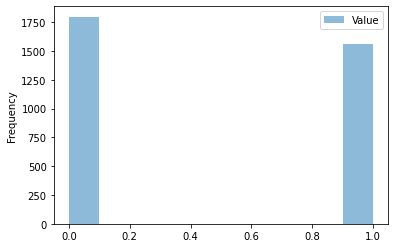

In [ ]:
# Distribución de clases
ax = train_label_1.plot.hist(bins=10, alpha=0.5)

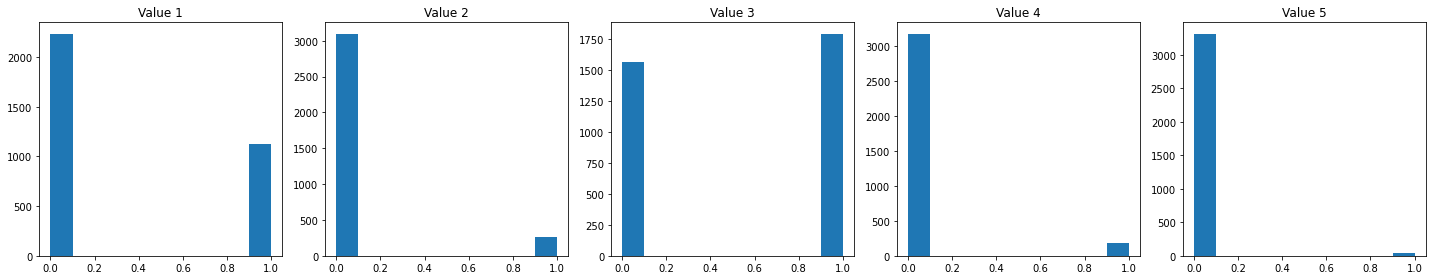

In [ ]:
fig, a = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
a = a.ravel()


for idx,ax in enumerate(a):
    ax.hist(train_label_2['Value '+str(idx+1)], label = '0 -> '+
            str((train_label_2['Value '+str(idx+1)].values == 0).sum())
             +'\n1 -> '+str((train_label_2['Value '+str(idx+1)].values == 1).sum()))
    ax.set_title('Value '+str(idx+1))
fig.tight_layout()
plt.show()

# **Load the Spacy model**

In [5]:
nlp = spacy.load('es_core_news_lg')

# **Limpieza de datos**

In [ ]:
train_set = pd.concat([train, test], ignore_index=True )
train_label = pd.concat([train_label_1, test_label_1], ignore_index=True)

In [ ]:
clean_text = (train_set['headline']
    .apply(lambda text: " "
            .join(token.lemma_ for token in nlp(text) if
                  not token.is_punct
                  and not token.is_currency
                  and not token.is_digit
                  and not token.is_punct
                  and not token.is_oov
                  and not token.is_space
                  and not token.is_stop
                  and not token.like_num
                  and not token.pos_ == "PROPN")))

tokens=[]
for text in clean_text: 
    token = nlp(text)
    tokens.append(token.vector)

print(len(tokens), len(train_label))

3412 3412


In [ ]:
tokens=[]
for text in train_set['headline']: 
    token = nlp(text)
    tokens.append(token.vector)

print(len(tokens), len(train_label))

3412 3412


# **Datos originales**

In [ ]:
X_vectors_train = []
for text in train['headline']:
  doc=nlp(text)
  #print(doc.vector)
  X_vectors_train.append(doc.vector)
  
print('text vectors for training were created' )

text vectors for training were created


In [ ]:
X_vectors_test = []
for text in test['headline']:
  doc=nlp(text)
  #print(doc.vector)
  X_vectors_test.append(doc.vector)

print('text vectors for test were created!!!')

text vectors for test were created!!!


In [ ]:
val_vectors = []
for text in val['headline']:
  doc=nlp(text)
  #print(doc.vector)
  val_vectors.append(doc.vector)

print('text vectors for val were created!!!')

text vectors for test were created!!!


# **Dividir datos limpios**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tokens, train_label, test_size=0.2, random_state=42)

print(len(y_train),len(y_test))

2729 683


# **Dividir datos originales**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors_train, train_label_1, test_size=0.2, random_state=42)

print(len(y_train),len(y_test))

2689 673


# **Entrenamiento del modelo datos limpios**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('classifier', RandomForestClassifier()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
from sklearn import svm


pipeline = Pipeline([
    ('classifier', svm.SVC(probability=True)),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import tree

pipeline = Pipeline([
    ('classifier', tree.DecisionTreeClassifier()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([
    ('classifier', GaussianNB()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
    ('classifier',  MLPClassifier()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import svm


pipeline = Pipeline([
    ('classifier', svm.SVC(gamma=2, C=1)),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('classifier',  KNeighborsClassifier()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# **Datos de Validación**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Entrenamiento del modelo datos originales**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('classifier', RandomForestClassifier()),
])

pipeline.fit(X_vectors_train,train_label_1['Value'])
predictions = pipeline.predict(X_vectors_test)

In [ ]:
from sklearn import svm


pipeline = Pipeline([
    ('classifier', svm.SVC(probability=True)),
])

pipeline.fit(X_vectors_train,train_label_1['Value'])
predictions = pipeline.predict(X_vectors_test)

# **Visualización de datos**

In [ ]:
pip install scikit-plot

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
# Import scikit-plot
import scikitplot as skplt

# **Datos limpios**

CPU times: user 5.19 s, sys: 74.6 ms, total: 5.26 s
Wall time: 15.3 s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

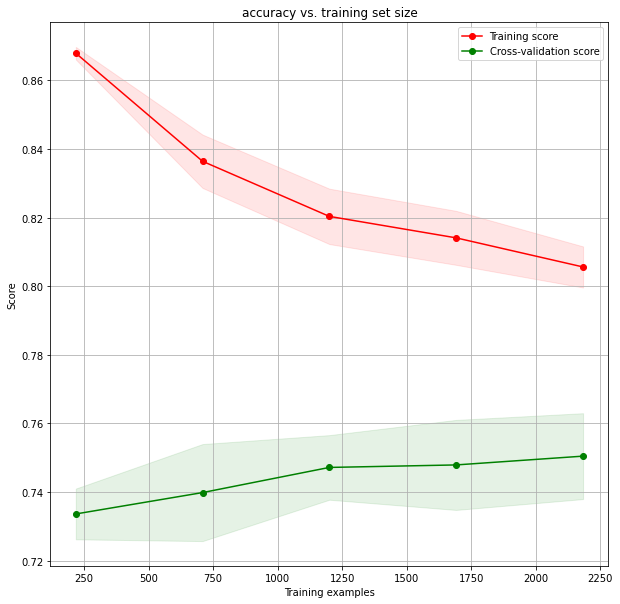

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_train, y_train, cv=5)

In [ ]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       356
           1       0.78      0.74      0.76       327

    accuracy                           0.78       683
   macro avg       0.78      0.78      0.78       683
weighted avg       0.78      0.78      0.78       683



In [ ]:
predict_y=pipeline.predict(X_test) 
cm = confusion_matrix(y_test,predict_y)
cm

array([[288,  68],
       [ 84, 243]])

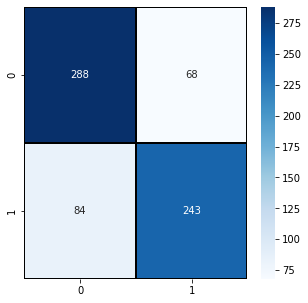

In [ ]:
import seaborn as sns

cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['0','1'] , yticklabels = ['0','1'])

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


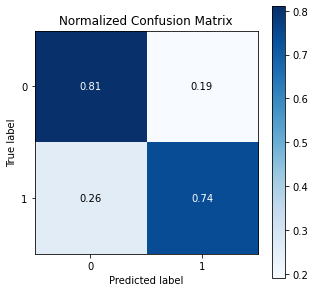

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
# Plot!
plot = skplt.metrics.plot_confusion_matrix(y_test, predict_y, normalize=True)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


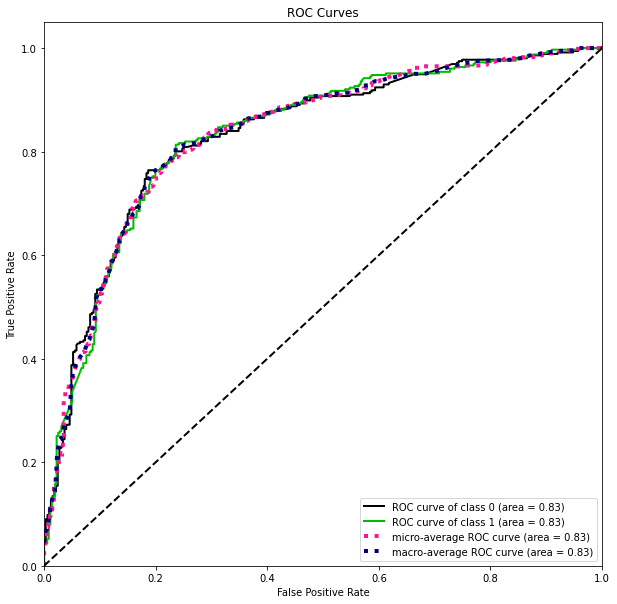

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

# Get y_probabilities
y_probas = pipeline.predict_proba(X_test)

# Plot!
skplt.metrics.plot_roc_curve(y_test, y_probas, cmap='nipy_spectral')
plt.show()

# **Datos originales**

CPU times: user 10.4 s, sys: 177 ms, total: 10.6 s
Wall time: 1min 2s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

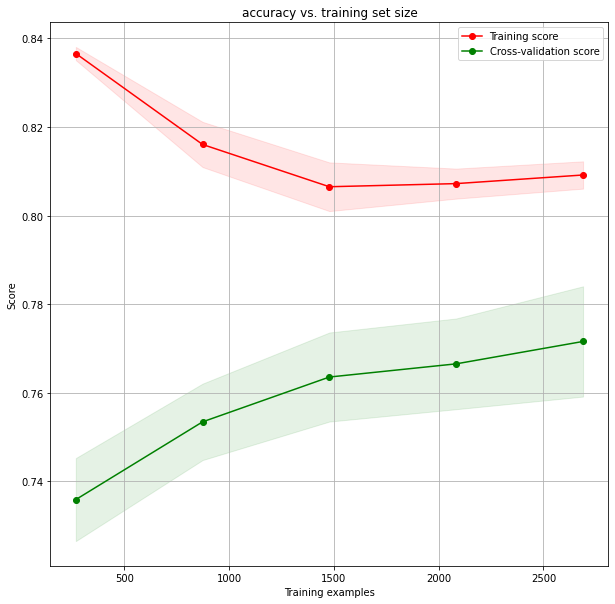

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_vectors_train, train_label_1['Value'], cv=5)

In [ ]:
print( classification_report(test_label_1['Value'], predictions))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.74      0.61      0.67        23

    accuracy                           0.72        50
   macro avg       0.72      0.71      0.71        50
weighted avg       0.72      0.72      0.72        50



In [ ]:
predict_y=pipeline.predict(X_vectors_test) 
cm = confusion_matrix(test_label_1['Value'],predict_y)
cm

array([[21,  6],
       [ 9, 14]])

In [ ]:
import seaborn as sns

cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['0','1'] , yticklabels = ['0','1'])

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot', 'cm', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


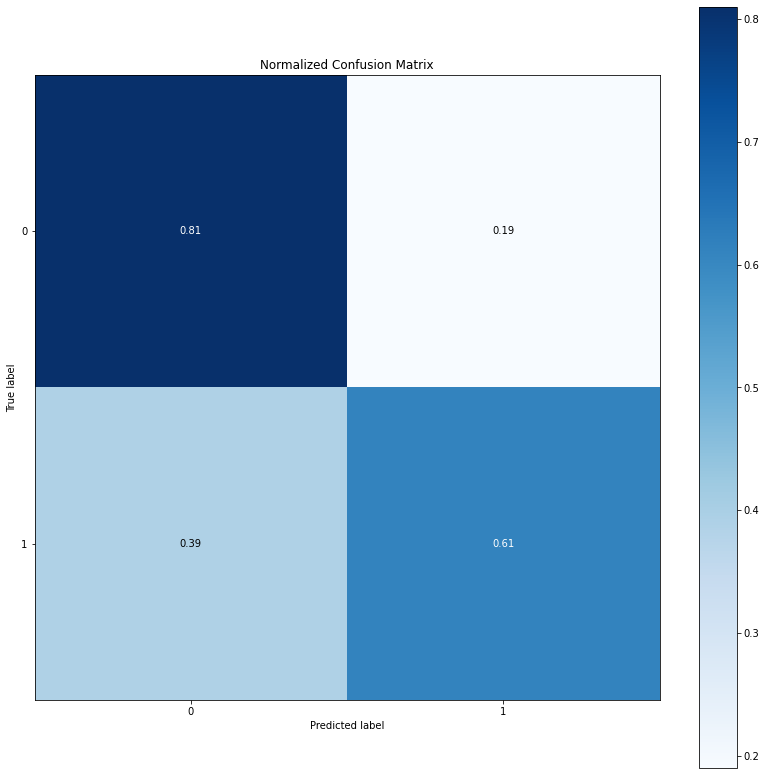

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
# Plot!
plot = skplt.metrics.plot_confusion_matrix(test_label_1['Value'], predict_y, normalize=True)

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

# Get y_probabilities
y_probas = pipeline.predict_proba(X_vectors_test)

# Plot!
skplt.metrics.plot_roc_curve(train_label_1, y_probas, cmap='nipy_spectral')
plt.show()

# Multiclasificación

- Class 0 --> Robo
- Class 1 --> Homicidio
- Class 2 --> Secuestro
- Class 3 --> Accidente
- Class 4 --> Ninguno

In [38]:
train = pd.read_csv(sst_home+"/Dataset/train_data.csv",  names=["headline"])
val = pd.read_csv(sst_home+"/Dataset/validation_data.csv", names=["headline"])
test = pd.read_csv(sst_home+"/Dataset/trial_data.csv", names=["headline"])
train_label_1 = pd.read_csv(sst_home+"/Dataset/train_labels_subtask_1.csv", names=["Value"])
train_label_2 = pd.read_csv(sst_home+"/Dataset/train_labels_subtask_2.csv", names=["Value 1", "Value 2", "Value 3", "Value 4", "Value 5"])
test_label_1 = pd.read_csv(sst_home+"/Dataset/trial_labels_subtask_1.csv", names=["Value"])
test_label_2 = pd.read_csv(sst_home+"/Dataset/trial_labels_subtask_2.csv", names=["Value 1", "Value 2", "Value 3", "Value 4", "Value 5"])

In [ ]:
train

,headline
0,#Ahora | Reportan accidente de tránsito en el ...
1,#PrecauciónVial en #CDMX se registra cierre pa...
2,#traficogt 🚨🚨👉 https://t.co/1Y9A5BmbKU 3. Se...
3,#HoyMismo #Internacionales | El Gobierno de J...
4,"Casos como el accidente en Villa Lorena, en el..."
...,...
3357,"Bomberos atendieron accidente vehicular, vía h..."
3358,El @bellasartesinba y @literaturainba recuerda...
3359,Recientemente lo dejaron libre bajo fianza y a...
3360,Accidente en Calle 127 &gt; Oriente #traficobo...


In [ ]:
len(train)

3362

In [ ]:
len(test)

50

In [ ]:
test_label_2["Value 1"].value_counts()

0    38
1    12
Name: Value 1, dtype: int64

In [ ]:
test_label_2["Value 2"].value_counts()

0    45
1     5
Name: Value 2, dtype: int64

# Unir los set de Train y Test para aumentar datos y realizar split mas adelante

In [39]:
train_set = pd.concat([train, test], ignore_index=True )
train_label = pd.concat([train_label_2, test_label_2], ignore_index=True)

In [40]:
print(len(train_set), len(train_label))

3412 3412


In [ ]:
train_set

,headline
0,#Ahora | Reportan accidente de tránsito en el ...
1,#PrecauciónVial en #CDMX se registra cierre pa...
2,#traficogt 🚨🚨👉 https://t.co/1Y9A5BmbKU 3. Se...
3,#HoyMismo #Internacionales | El Gobierno de J...
4,"Casos como el accidente en Villa Lorena, en el..."
...,...
3407,Dos policías municipales de Manzanillo quedaro...
3408,el suicidio es un evento inesperado y multicau...
3409,#PrecauciónVial en #Jalisco se registra cierre...
3410,"🆘 De acuerdo con cifras oficiales, la violenci..."


In [ ]:
train_label

,Value 1,Value 2,Value 3,Value 4,Value 5
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
3407,0,1,0,0,1
3408,0,0,1,0,0
3409,0,0,1,0,0
3410,0,0,1,0,0


# Crear dataframe con todas las clases y etiquetas correspondientes

In [41]:
df = pd.DataFrame()
data = {"Text": "", "Label": 0}
i = 0

for tweet in train_set['headline']:
  data["Text"] = tweet
  if train_label['Value 1'][i] == 1:
    data["Label"] = int(0)
  elif int(train_label['Value 2'][i]) == 1:
    data["Label"] = int(1)
  elif train_label['Value 3'][i] == 1:
    data["Label"] = int(2)
  elif train_label['Value 4'][i] == 1:
    data["Label"] = int(3)
  elif train_label['Value 5'][i] == 1:
    data["Label"] = int(4)
  else:
    data["Label"] = -1
  
  df = df.append(data, ignore_index=True)
  i+=1


# Aumentar clases desbalanceadas clases manualmente

In [32]:
df = pd.DataFrame()
data = {"Text": "", "Label": 0}
i = 0

for tweet in train_set['headline']:
  data["Text"] = tweet
  if train_label['Value 1'][i] == 1:
    data["Label"] = int(0)
  elif int(train_label['Value 2'][i]) == 1:
    data["Label"] = int(1)
    for j in range(0, 5):
      df = df.append(data, ignore_index=True)
  elif train_label['Value 3'][i] == 1:
    data["Label"] = int(2)
  elif train_label['Value 4'][i] == 1:
    data["Label"] = int(3)
    for j in range(0, 5):
      df = df.append(data, ignore_index=True)
  elif train_label['Value 5'][i] == 1:
    data["Label"] = int(4)
    for j in range(0, 10):
      df = df.append(data, ignore_index=True) 
  else:
    data["Label"] = -1
  
  df = df.append(data, ignore_index=True)
  i+=1



In [ ]:
df.head()

,Text,Label
0,#Ahora | Reportan accidente de tránsito en el ...,0.0
1,#PrecauciónVial en #CDMX se registra cierre pa...,2.0
2,#traficogt 🚨🚨👉 https://t.co/1Y9A5BmbKU 3. Se...,2.0
3,#HoyMismo #Internacionales | El Gobierno de J...,2.0
4,"Casos como el accidente en Villa Lorena, en el...",2.0


In [ ]:
len(df)

7447

In [42]:
df["Label"].value_counts()

2.0    1825
0.0    1137
1.0     249
3.0     162
4.0      39
Name: Label, dtype: int64

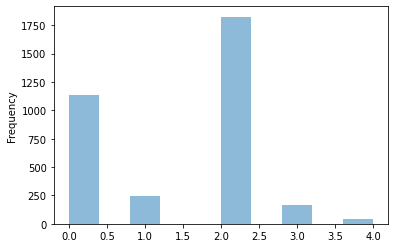

In [43]:
ax = df["Label"].plot.hist(bins=10, alpha=0.5)

# Limpiar texto

In [44]:
clean_text = (df['Text']
    .apply(lambda text: " "
            .join(token.lemma_ for token in nlp(text) if
                  not token.is_punct
                  and not token.is_currency
                  and not token.is_digit
                  and not token.is_punct
                  and not token.is_oov
                  and not token.is_space
                  and not token.is_stop
                  and not token.like_num
                  and not token.pos_ == "PROPN")))

X_vectors_train=[]
for text in clean_text: 
    token = nlp(text)
    X_vectors_train.append(token.vector)

print(len(X_vectors_train), len(df['Label']))

3412 3412


# Utilizar texto sin limpiar

In [ ]:
X_vectors_train = []
for text in X_train:
  doc=nlp(text)
  #print(doc.vector)
  X_vectors_train.append(doc.vector)
  
print('text vectors for training were created' )

ValueError: ignored

# Random oversampling to balance the class distribution

In [45]:
# example of random oversampling to balance the class distribution

from collections import Counter

from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy

oversample = RandomOverSampler(sampling_strategy={0:1137, 1:500, 2:1825, 3:500, 4:500}, random_state=42)

# fit and apply the transform

X_over, y_over = oversample.fit_resample(X_vectors_train,  df["Label"])

# summarize class distribution

print(Counter(y_over))

Counter({2.0: 1825, 0.0: 1137, 3.0: 500, 1.0: 500, 4.0: 500})


# Oversample imbalanced dataset with SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [26]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform the dataset
strategy = {0:1137, 1:300, 2:1825, 3:300, 4:200}
oversample = SMOTE(sampling_strategy=strategy)
X_over, y_over = oversample.fit_resample(X_vectors_train, df["Label"])
# summarize the new class distribution
counter = Counter(y_over)
print(counter)


Counter({2.0: 1825, 0.0: 1137, 3.0: 300, 1.0: 300, 4.0: 200})


# Oversample imbalanced dataset with ADASYN

In [27]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where

# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X_vectors_train, df["Label"])
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1.0: 1847, 4.0: 1833, 2.0: 1825, 3.0: 1814, 0.0: 1701})


# Split dataset

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

print(len(y_train),len(y_test))

3569 893


In [47]:
y_test.value_counts()

2.0    370
0.0    223
4.0    111
3.0     95
1.0     94
Name: Label, dtype: int64

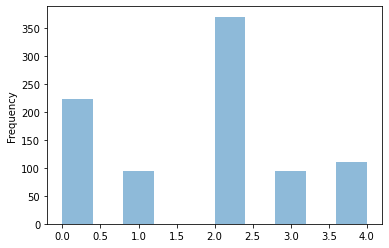

In [48]:
y_test.plot.hist(bins=10, alpha=0.5)

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [57]:
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('classifier', RandomForestClassifier()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

CPU times: user 1min 9s, sys: 334 ms, total: 1min 10s
Wall time: 1min 16s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

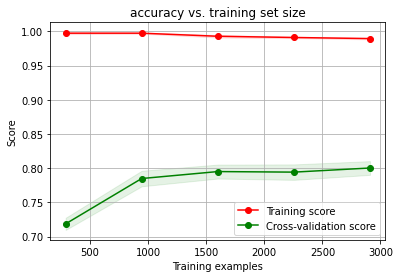

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_train, y_train, cv=5)

In [58]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       223
         1.0       0.96      0.69      0.80        94
         2.0       0.76      0.87      0.81       370
         3.0       0.96      0.86      0.91        95
         4.0       1.00      1.00      1.00       111

    accuracy                           0.82       893
   macro avg       0.89      0.82      0.85       893
weighted avg       0.83      0.82      0.82       893



In [55]:
from sklearn import svm


pipeline2 = Pipeline([
    ('classifier', svm.SVC(probability=True)),
])

pipeline2.fit(X_train,y_train)
predictions = pipeline2.predict(X_test)

CPU times: user 16 s, sys: 273 ms, total: 16.3 s
Wall time: 3min 1s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

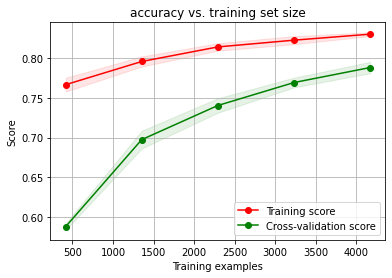

In [ ]:
%time plot_learning_curve(pipeline2, "accuracy vs. training set size", X_train, y_train, cv=5)

In [56]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       223
         1.0       0.79      0.44      0.56        94
         2.0       0.70      0.83      0.76       370
         3.0       0.75      0.48      0.59        95
         4.0       0.94      0.95      0.94       111

    accuracy                           0.75       893
   macro avg       0.78      0.69      0.72       893
weighted avg       0.75      0.75      0.74       893

